# Baseline Model: Linear Regression

The main idea to train and test the model is shown as follows:
1. Split the dataset into training set and test set and use the cross validation method to evaluate the model
2. Use the whole training set to train the model
3. Use the model to predict the mean_temp, min_temp, max_temp and precipitation
4. Visualize the result

划分部分数据为训练集，用这一部分进行训练，使用交叉验证方法对剩余部分数据进行交叉验证来评估模型效果，再用这个模型来预测2020年的数据并进行可视化。

Single shot and predict one day ahead

Import libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data

In [35]:
df=pd.read_csv('../dataset_for_analysis/data_weather_new1.csv',parse_dates=['date'])

## Normalization and modeling

Define the training set and test set
The data in 2020 is regarded as test set

In [36]:
# Calculate the number of rows of the training set
training_rows=int(len(df))
print(f"The dataset contains {training_rows} rows.")
print(f"The percentage of data in 2020 is {366/training_rows}")

The dataset contains 15341 rows.
The percentage of data in 2020 is 0.02385763639919171


In [37]:
from sklearn.model_selection import train_test_split

X=df[['cloud_cover','sunshine','global_radiation','pressure']]
Y=df[['mean_temp','max_temp','min_temp','precipitation']]

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.02385,shuffle=False)

Initiate the Standard Scaler

In [38]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)



## Single output

Define the models for each target variable

In [39]:
from sklearn.linear_model import LinearRegression

# Create linear regression models
models={
    'mean_temp':LinearRegression(),
    'precipitation':LinearRegression(),
    'min_temp':LinearRegression(),
    'max_temp':LinearRegression()
}


Use cross validation method to evaluate the model

In [40]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Initiate the Time Series Split
tscv=TimeSeriesSplit(n_splits=5)

# Train the models
for target_variable,model in models.items():

    # Store the mse value
    mse_scores=[]

    # Split the training set and test set
    for train_index,test_index in tscv.split(xtrain):
        X_train=X.iloc[train_index]
        y_train=Y[target_variable].iloc[train_index]

        X_test=X.iloc[test_index]
        y_test=Y[target_variable].iloc[test_index]

        # Normalize the data
        scaler=StandardScaler()
        X_train=scaler.fit_transform(X_train)
        X_test=scaler.fit_transform(X_test)

        # Train the model
        model.fit(X_train,y_train)

        # Make the predictions
        y_pred=model.predict(X_test)

        # Calculate the mean squared error
        mse=mean_squared_error(y_test,y_pred)
        mse_scores.append(mse)

    # Print the result
    print(f'MSE of {target_variable} prediction: {np.mean(mse_scores): .3f}')

MSE of mean_temp prediction:  16.802
MSE of precipitation prediction:  7.612
MSE of min_temp prediction:  17.379
MSE of max_temp prediction:  19.001


### Use the training set to train the model

In [41]:
for target_variable,model in models.items():
    model.fit(xtrain,ytrain[target_variable])
    print(model)

LinearRegression()
LinearRegression()
LinearRegression()
LinearRegression()


### Predict the data in 2020

In [42]:
# Calculate the predicted value
mean_temp_2020_pred=models['mean_temp'].predict(xtest)
precipitation_2020_pred=models['precipitation'].predict(xtest)
min_temp_2020_pred=models['min_temp'].predict(xtest)
max_temp_2020_pred=models['max_temp'].predict(xtest)

# Print the result
print(f"MSE of mean_temp: {mean_squared_error(ytest['mean_temp'],mean_temp_2020_pred): .3f}")
print(f"MSE of precipitation: {mean_squared_error(ytest['precipitation'],precipitation_2020_pred): .3f}")
print(f"MSE of min_temp: {mean_squared_error(ytest['min_temp'],min_temp_2020_pred): .3f}")
print(f"MSE of max_temp: {mean_squared_error(ytest['max_temp'],max_temp_2020_pred): .3f}")


MSE of mean_temp:  16.697
MSE of precipitation:  7.312
MSE of min_temp:  17.177
MSE of max_temp:  16.942


Visualize the result

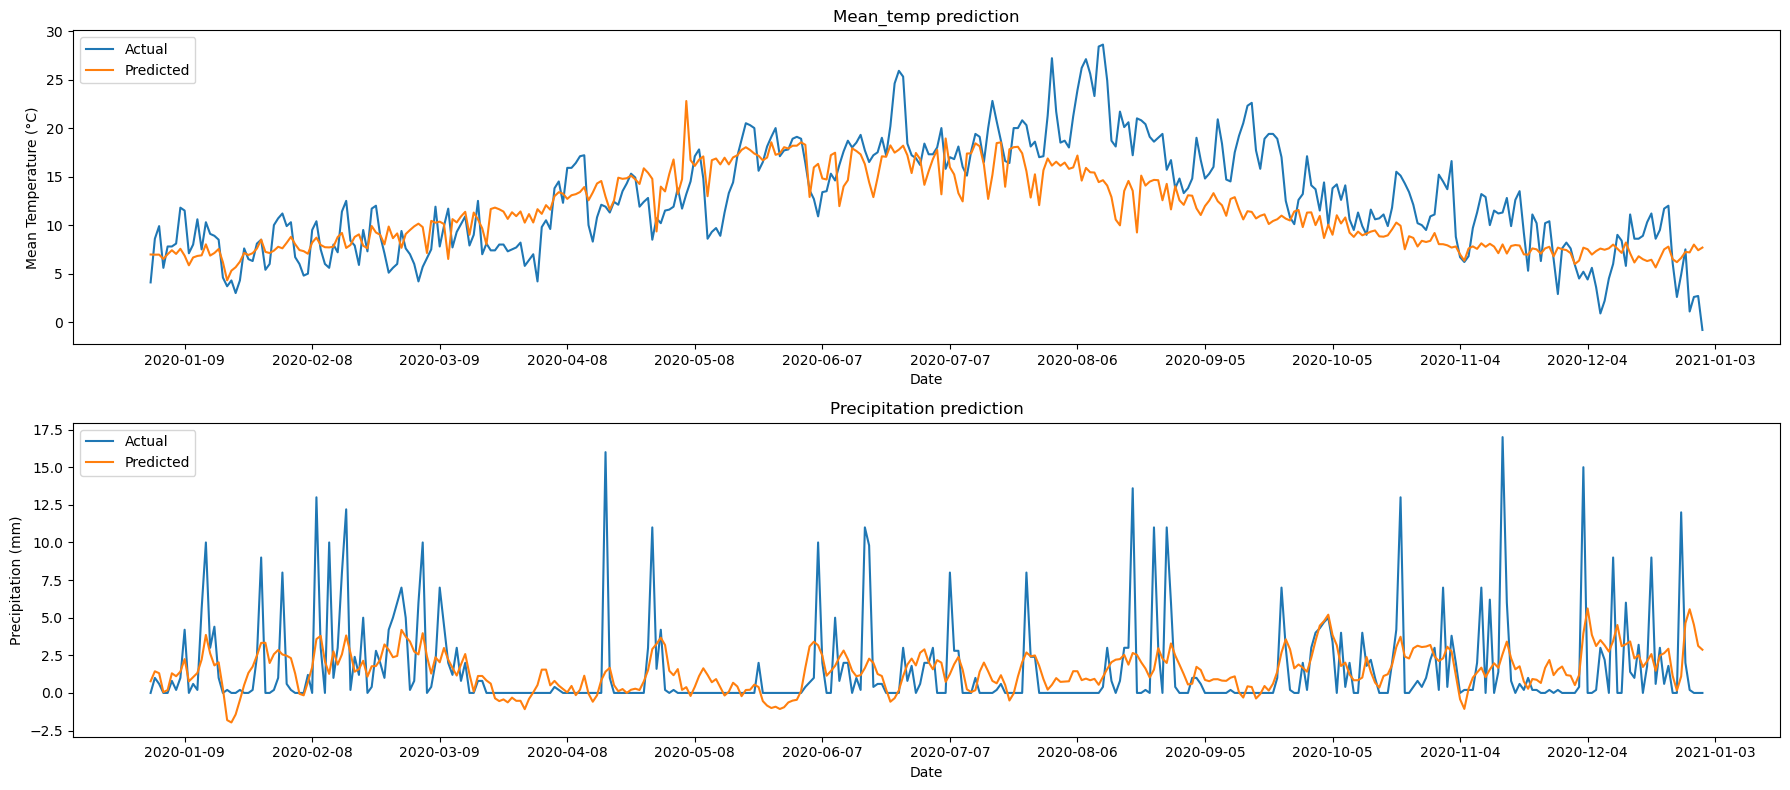

In [43]:
# Create the figure containing two subplots
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(18,8))

date=df[df['date'].dt.year==2020]
date=date['date']

# The plot for mean_temp
ax1.plot(date,ytest['mean_temp'],label='Actual')
ax1.plot(date,mean_temp_2020_pred, label='Predicted')
ax1.set_xlabel('Date')
ax1.set_ylabel('Mean Temperature (°C)')
ax1.set_title('Mean_temp prediction')
ax1.legend(loc='upper left')

# The plot for precipitation
ax2.plot(date, ytest['precipitation'],label='Actual')
ax2.plot(date, precipitation_2020_pred,label='Predicted')
ax2.set_xlabel('Date')
ax2.set_ylabel('Precipitation (mm)')
ax2.set_title('Precipitation prediction')
ax2.legend(loc='upper left')

ax1.xaxis.set_major_locator(plt.MaxNLocator(14))
ax2.xaxis.set_major_locator(plt.MaxNLocator(14))

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()

## Multiple output

Train and evaluate the model

In [44]:
from sklearn.multioutput import MultiOutputRegressor

lr=LinearRegression()
model=MultiOutputRegressor(lr)

mse_scores1=[]

for train_index,test_index in tscv.split(xtrain):
    X_train=X.iloc[train_index]
    y_train=Y.iloc[train_index]

    X_test=X.iloc[test_index]
    y_test=Y.iloc[test_index]

    # Normalize the data
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.fit_transform(X_test)

    # Train the model
    model.fit(X_train,y_train)

    # Make the predictions
    y_pred=model.predict(X_test)

    # Calculate the mean squared error
    mse=mean_squared_error(y_test,y_pred)
    mse_scores1.append(mse)

# Print the result
print(f'MSE of prediction: {np.mean(mse_scores1): .3f}')

MSE of prediction:  15.199


### Use the training set to train the model

In [45]:
model.fit(xtrain,ytrain)

MultiOutputRegressor(estimator=LinearRegression())

Predict the data in 2020

In [46]:
y_pred_2020_multi=model.predict(xtest)
print(f"MSE for multiple output of 2020 data: {mean_squared_error(ytest[['mean_temp','max_temp','min_temp','precipitation']].values,y_pred_2020_multi): .3f}")

MSE for multiple output of 2020 data:  14.532


By comparison, the result of multiple output obtained by linear regression method equals to the result of each single output obtained by linear regression.